# Data Transformations

Often in the real world, the data receive needs to have different techniques applied to it before we can find any insights. This lesson is going to focus on a lot of possible data transformations you may want to use in the future on a given dataset.

### Sales Data

Let's introduce our first data set, sales data from a random company. The x-axis is the month (in terms of t months since inception), while the y-axis is the units sold in thousands. As you will be able to see, the company has really been getting off its feet lately! You do not need to yet understand the data creation process.

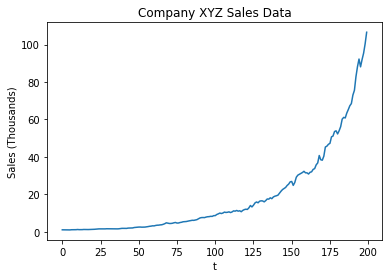

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create the data, ignore for now
np.random.seed(1)
sales = np.cumprod(np.random.normal(1.02, .04, 200))


#Plot the sales
plt.plot(sales)
plt.xlabel("t")
plt.ylabel("Sales (Thousands)")
plt.title("Company XYZ Sales Data")
plt.show()

## The Log Transformation

Exponential growth is a very classic phenomenon where growth is curving upwards faster and faster. For many techniques we need linear data to properly apply a model, which can be an issue if the true data is not linear. What the log transformation does is apply the log function to each data point. This will deal with exponential growth quite well in many cases. We can apply it with np.log which will return a new object where the log transformation was applied.

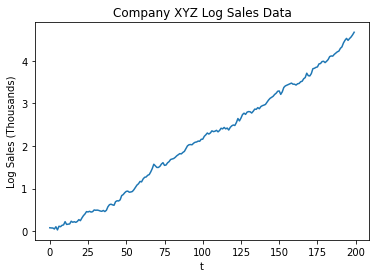

In [2]:
#Transform the sales to log sales
log_sales = np.log(sales)

#Plot the log sales
plt.plot(log_sales)
plt.xlabel("t")
plt.ylabel("Log Sales (Thousands)")
plt.title("Company XYZ Log Sales Data")
plt.show()

To reverse a log transformation you can use np.exp which takes e to each number and essentially will cancel out the log transformation. Notice how the first 5 values are the same below.

In [3]:
#Compare the reversed values
print(sales[:5])
print(np.exp(log_sales[:5]))

[1.08497381 1.0801237  1.07890654 1.05417936 1.11175474]
[1.08497381 1.0801237  1.07890654 1.05417936 1.11175474]


## Clip

You can use clip to take values and set either a minimum or a maximum. Let's start with a basic sample and see what it looks like at first look.

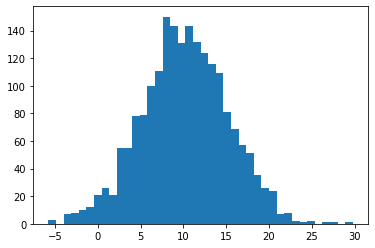

In [4]:
#Create some test data, ignore for now
np.random.seed(1)
sample = np.random.normal(10, 5, 2000)

#Plot the test data
plt.hist(sample, bins=40)
plt.show()

We call clip with a first argument as the minimum value and the second argument as the maximum value. So the code below will get us to a sample where values can only be between 0 and 20.

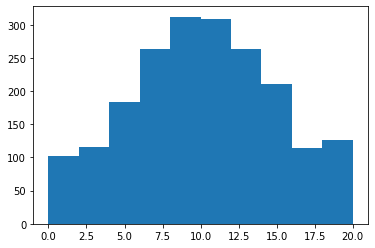

In [5]:
#Clip the sample to be between 0 and 20, then plot a histogram of it
plt.hist(sample.clip(0, 20))
plt.show()

We call clip with a first argument as the minimum value and the second argument as the maximum value. So the code below will get us to a sample where values can only be between 5 and 15.

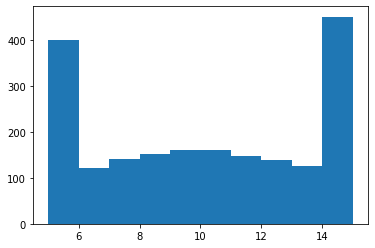

In [6]:
#Clip between 5 and 15
plt.hist(sample.clip(5, 15))
plt.show()

If you want only a maximum or a minimum set you can use None instead of setting a number. For example, below is setting just a maximum of 15.

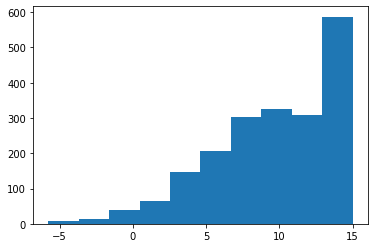

In [7]:
#Clip to have a maximum of 15
plt.hist(sample.clip(None, 15))
plt.show()

Set a minimum of 5.

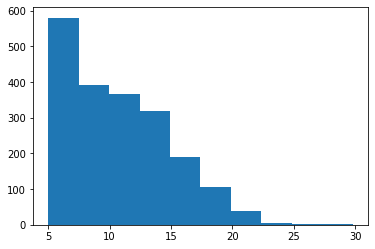

In [8]:
#Clip to have a minimum of 5
plt.hist(sample.clip(5, None))
plt.show()

## Stack

The stack function takes a dataframe and brings down each column. It can be tough to explain it so let's just see what it looks like.

In [9]:
#Create the GDP object
gdp = pd.DataFrame([[.03, .04, .03],
[.05, .03, .01],
[.02, .02, .07],
[.03, .01, .02]], index=["Q1", "Q2", "Q3", "Q4"], columns=['Country A', "Country B", "Country C"])

print("Before stack:")
print(gdp)
print()

#Stack
gdp = gdp.stack()
print("After stack:")
print(gdp)

Before stack:
    Country A  Country B  Country C
Q1       0.03       0.04       0.03
Q2       0.05       0.03       0.01
Q3       0.02       0.02       0.07
Q4       0.03       0.01       0.02

After stack:
Q1  Country A    0.03
    Country B    0.04
    Country C    0.03
Q2  Country A    0.05
    Country B    0.03
    Country C    0.01
Q3  Country A    0.02
    Country B    0.02
    Country C    0.07
Q4  Country A    0.03
    Country B    0.01
    Country C    0.02
dtype: float64


So you will see that we went from 4x3 dataframe to 12 values. One result of using this is that we now have a new type of index. Let's check out what we get out.

In [10]:
#Print out the GDP index after stacking
print(gdp.index)

MultiIndex([('Q1', 'Country A'),
            ('Q1', 'Country B'),
            ('Q1', 'Country C'),
            ('Q2', 'Country A'),
            ('Q2', 'Country B'),
            ('Q2', 'Country C'),
            ('Q3', 'Country A'),
            ('Q3', 'Country B'),
            ('Q3', 'Country C'),
            ('Q4', 'Country A'),
            ('Q4', 'Country B'),
            ('Q4', 'Country C')],
           )


## Multi-index

After we have used stack, there are 12 values but also there is something new, a multi-index. What a multi-index does is essnetially instead of identifying each row with one value, there are tuples of values that identify them. You can still use loc, but you need to give a tuple. For example, to get the data for Q1 and country A, we feed that tuple in.

In [11]:
#Get back the value for Q1, Country A
print(gdp.loc[('Q1', 'Country A')])

0.03


You also can pass in a list of tuples to get multiple values back.

In [12]:
#Find multiple values
print(gdp.loc[[('Q1', 'Country A'),
        ('Q1', 'Country B')]])

Q1  Country A    0.03
    Country B    0.04
dtype: float64


If you index with just one label (which needs to be the outer index label), you can get back only values equal to that. For example, if you wanted to get back only Q1 values, the following will achieve this:

In [13]:
print(gdp.loc["Q1"])

Country A    0.03
Country B    0.04
Country C    0.03
dtype: float64


You are also free to access the index values if you need them for any purpose with get_level_values. It needs an argument of which index to use. So for this case we can get the outer index with 0, inner index with 1.

In [14]:
#Get the outer index values
print(gdp.index.get_level_values(0))

Index(['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4'], dtype='object')


In [15]:
#Get the inner index values
print(gdp.index.get_level_values(1))

Index(['Country A', 'Country B', 'Country C', 'Country A', 'Country B',
       'Country C', 'Country A', 'Country B', 'Country C', 'Country A',
       'Country B', 'Country C'],
      dtype='object')


## Pivot

If you have used pivot tables in excel, this function should feel natural to you. The pivot function will take three columns and then pivot for those values. The first argument is which column indicates the row, the second is which indicates the columns, and the third is which indicates the values. Notice how the sales_location_data looks before and after pivoting.

In [16]:
#Create the data
sales_location_data = pd.DataFrame([["A", 1, 1000],
             ["B", 1, 5000],
             ["C", 1, 2000],
             ["A", 2, 4000],
             ["B", 2, 2000],
             ["A", 3, 8000],
             ["C", 3, 8000]], columns=['Product', 'Location', 'Sales'])

print("Before the pivot:")
print(sales_location_data)
print()

#Pivot
sales_location_data = sales_location_data.pivot('Product', 'Location', 'Sales')
print("After the pivot:")
print(sales_location_data)

Before the pivot:
  Product  Location  Sales
0       A         1   1000
1       B         1   5000
2       C         1   2000
3       A         2   4000
4       B         2   2000
5       A         3   8000
6       C         3   8000

After the pivot:
Location       1       2       3
Product                         
A         1000.0  4000.0  8000.0
B         5000.0  2000.0     NaN
C         2000.0     NaN  8000.0


If there is not a value then we automatically get a null value. We can fill those with 0 by using fillna.

In [17]:
#Fill null values
sales_location_data = sales_location_data.fillna(0)
print(sales_location_data)

Location       1       2       3
Product                         
A         1000.0  4000.0  8000.0
B         5000.0  2000.0     0.0
C         2000.0     0.0  8000.0


## Applying Functions to Different Axes

There are many built in functions you can use to find statistics or other measures for either the rows or the columns. For example, if you call mean() for the dataframe we just worked with, we get the average for each of the columns.

In [18]:
print(sales_location_data.mean())

Location
1    2666.666667
2    2000.000000
3    5333.333333
dtype: float64


If you give the argument of axis=1, we get the mean by the rows.

In [19]:
print(sales_location_data.mean(axis=1))

Product
A    4333.333333
B    2333.333333
C    3333.333333
dtype: float64


The default behavior is axis=0 or the average by the columns.

In [20]:
print(sales_location_data.mean(axis=0))

Location
1    2666.666667
2    2000.000000
3    5333.333333
dtype: float64


One thing to note is how these functions will work differently with null values. Let's first bring back the data with null values.

In [21]:
#Create the data
sales_location_data = pd.DataFrame([["A", 1, 1000],
             ["B", 1, 5000],
             ["C", 1, 2000],
             ["A", 2, 4000],
             ["B", 2, 2000],
             ["A", 3, 8000],
             ["C", 3, 8000]], columns=['Product', 'Location', 'Sales'])

#Pivot
sales_location_data = sales_location_data.pivot('Product', 'Location', 'Sales')
print(sales_location_data)

Location       1       2       3
Product                         
A         1000.0  4000.0  8000.0
B         5000.0  2000.0     NaN
C         2000.0     NaN  8000.0


If we call for the mean now, by column, it is going to ignore the null values instead of counting them as 0!

In [22]:
print(sales_location_data.mean())

Location
1    2666.666667
2    3000.000000
3    8000.000000
dtype: float64


It is important to decide how to handle the null values because of this! Also there are many other functions you can apply, for example:

In [23]:
#Get a few metrics

print("Maximum:")
print(sales_location_data.max())
print()
print()

print("Minimum:")
print(sales_location_data.min())
print()
print()

print("Sum:")
print(sales_location_data.sum())
print()
print()

Maximum:
Location
1    5000.0
2    4000.0
3    8000.0
dtype: float64


Minimum:
Location
1    1000.0
2    2000.0
3    8000.0
dtype: float64


Sum:
Location
1     8000.0
2     6000.0
3    16000.0
dtype: float64




## Window Functions

Window functions let us apply something over segments of our data. To begin with, let's get a set of data that is supposed to be daily sales. Don't worry about the code below it is just creating the data.

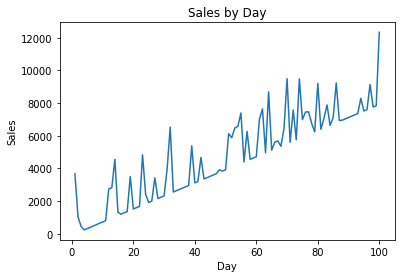

In [24]:
np.random.seed(3)
daily_sales = pd.Series(np.random.normal(100, 2000, 100))
daily_sales = daily_sales.clip(0, None) + np.array(range(100)) * 80
daily_sales.index = daily_sales.index + 1
daily_sales.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales by Day")
plt.show()

### Expanding Window

An expanding window is one where we go through each row of data and run a function using that row and everything before it. For our data here there is an obvious application, we can find the running total sales over the days. The way we call it is calling expanding() on a series or dataframe and then calling another function after it. The code below creates total sales by running expanding and adding up the total sales at each point.

In [25]:
#Get ther running total with an expanding window
total_sales = daily_sales.expanding().sum()
print(total_sales)

1        3677.256947
2        4730.276648
3        5183.271584
4        5423.271584
5        5743.271584
           ...      
96     440201.979933
97     449340.123133
98     457100.123133
99     464940.123133
100    477276.421817
Length: 100, dtype: float64


We may also want to have the first value be equal to 0. We can do that by using loc and setting the value to 0.

In [26]:
#Set t=0 to 0
total_sales.loc[0] = 0
print(total_sales)

1        3677.256947
2        4730.276648
3        5183.271584
4        5423.271584
5        5743.271584
           ...      
97     449340.123133
98     457100.123133
99     464940.123133
100    477276.421817
0           0.000000
Length: 101, dtype: float64


It is out of order, though, and so we want to use sort_index() to sort our data into the correct order.

In [27]:
#Sort total sales
total_sales = total_sales.sort_index()
print(total_sales)

0           0.000000
1        3677.256947
2        4730.276648
3        5183.271584
4        5423.271584
           ...      
96     440201.979933
97     449340.123133
98     457100.123133
99     464940.123133
100    477276.421817
Length: 101, dtype: float64


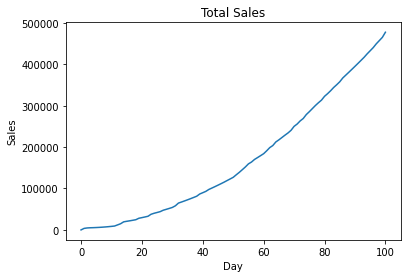

In [28]:
#Plot total sales
total_sales.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Total Sales")
plt.show()

### Rolling Window

A rolling window takes the last n rows including the current one and computes a calculation. For this example, we might be interested in smoothing out our daily sales to see if there is a trend. To do this we can use rolling and the function mean to find the rolling mean. You will notice larger numbers for n leads to smoother functions. For example:

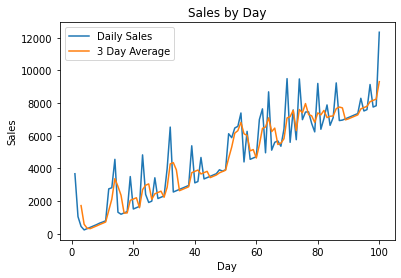

In [29]:
#Find the averages of the last 3 days
avg3d = daily_sales.rolling(3).mean()

#Plot with the regular sales
daily_sales.plot(kind='line')
avg3d.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales by Day")
plt.legend(['Daily Sales', '3 Day Average'])
plt.show()

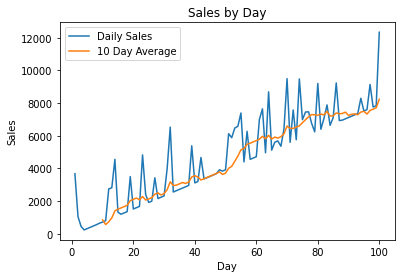

In [30]:
#Find the averages of the last 10 days
avg10d = daily_sales.rolling(10).mean()

#Plot with the regular sales
daily_sales.plot(kind='line')
avg10d.plot(kind='line')
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("Sales by Day")
plt.legend(['Daily Sales', '10 Day Average'])
plt.show()